****Floating Point Error in Horner's Rule Polynomial Evaluation****

The following example is taken from *Applied Numerical Linear Algebra* by James Demmel, SIAM 1997.

Here are three methods for evaluating the function

$$f(x)=(x-2)^9 = -512 + 2304x -4608x^2 +5476x^3 -4032x^4 +2016x^5-672x^6+144x^7-18x^8+x^9$$


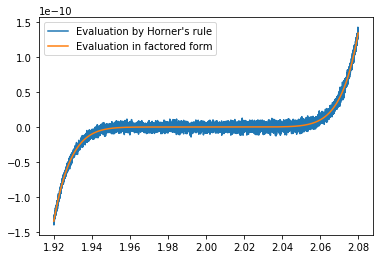

In [13]:
import numpy as np

#Evalue  polynomial in factored form
def f(x):
    return (x-2.)**9

#coefficients for expanded form
coeffs = np.asarray([-512., 2304., -4608., 5376., -4032., 2016., -672., 144., -18., 1.])

#Evaluate polynomial using coefficients
def p(x):
    return np.inner(coeffs, np.asarray([x**i for i in range(10)]))

#Evaluate Horner's rule for polynomial
def h(x):
    y = 0.
    #[::-1] looks at all elements with stride -1, reversing the order
    for c in coeffs[::-1]:
        y = x*y+c
    return y

#Define 8000 points between 1.92 and 2.08
xpts = 1.92+np.arange(8000.)/50000.

import matplotlib
import matplotlib.pyplot as pt

#plot functions evaluated at each point using Horder's rule and using factored form
pt.plot(xpts,[h(x) for x in xpts],label='Evaluation by Horner\'s rule')
pt.plot(xpts,[f(x) for x in xpts],label='Evaluation in factored form')
pt.legend()
pt.show()


It seems Horner's rule is inaccurate when $f(x)\approx 0$, lets try to understand why.

The first method uses $(x-2)^9$ directly, encurring a backward error of $\epsilon$ (machine epsilon), since given $z=\textit{fl}(x+2)$, we can obtain $z^9$ to the same precision, therby solving the problem for $\hat{x}=\textit{fl}(x+2)-2=x+ \Delta x$, $|\Delta x|\leq \epsilon$. 

The second uses the inner product formula
$$f(x)=p(x)= \sum_{i=0}^9c_ix^i =\begin{bmatrix} -512 & 2304 & -4608 & 5476 & -4032 & 2016 & -672 & 144 & 18& 1 \end{bmatrix}\begin{bmatrix}  1\\ x \\ x^2 \\ x^3 \\ x^4 \\ x^5 \\ x^6 \\ x^7 \\ x^8 \\ x^9 \end{bmatrix}$$

The third uses Horner's rule, which requires fewer operations

$$f(x)=h(x) = c_0 + (c_1 + \ldots (c_8 + c_9x)x \ldots )x$$

Each addition in the last two methods incurs a relative error of at most $\epsilon$. An error in the innermost parenthesis, would correspond to evaluating the function at a slightly perturbed $x$. However, the error in the summation done last, contributes directly to the result. When $\left|f(x)\right|<|c_0|\epsilon$, the result will contain no accurate significant digits.

In terms of backward stability, extrapolating the above argument implies that the backward absolute error bound has the bound
$$\textit{fl}(h(x))-f(x)=\Delta x \leq \epsilon \left(1+\left|\frac{df^{-1}}{dx}(x)\right|\right).$$

More generally, given their factorized form, we can evaluate any function with unconditional backward stability. But factorization is hard!